# Retail Sales Prediction using RNN
**(Tensorflow | Keras)**

_

#### Predicción de ventas utilizando RNN

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import emoji

---

## Data | Datos

### Retail Sales: Clothing and Clothing Accessory Stores

**Advance Monthly Sales for Retail and Food Services**

**Units:**  Millions of Dollars, Not Seasonally Adjusted


The Advance Monthly Retail Trade Survey (MARTS) provides an early indication of sales of retail and food service companies. It was developed in response to requests by government, business, and other users to provide an early indication of current retail trade activity in the United States. Retail sales are one of the primary measures of consumer demand for both durable and non-durable goods. MARTS also provides an estimate of monthly sales at food service establishments and drinking places.

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN



_

**Ventas al por menor: tiendas de ropa**

La  Advance Monthly Retail Trade Survey, MARTS (Encuesta de Comercio Minorista Mensual Avanzada)  proporciona una indicación temprana de las ventas de las empresas minoristas y de servicios de alimentos. Fue desarrollada en respuesta a las solicitudes del gobierno, las empresas y otros usuarios para proporcionar una indicación temprana de la actividad comercial minorista en los Estados Unidos. Las ventas minoristas son una de las principales medidas de la demanda de los consumidores de bienes duraderos y no duraderos. MARTS también proporciona una estimación de las ventas mensuales en establecimientos de servicio de alimentos y lugares para beber.

El valor del mes más reciente es una estimación anticipada que se basa en datos de una submuestra de empresas de la Encuesta mensual de comercio minorista más grande.  La serie asociada de la Encuesta Mensual de Comercio Minorista está disponible en https://fred.stlouisfed.org/series/MRTSSM448USN

_


U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.



In [2]:
df = pd.read_csv('RSCCASN.csv')

In [3]:
df

,DATE,RSCCASN
0,1992-01-01,6938
1,1992-02-01,7524
2,1992-03-01,8475
3,1992-04-01,9401
4,1992-05-01,9558
...,...,...
329,2019-06-01,21123
330,2019-07-01,21714
331,2019-08-01,23791
332,2019-09-01,19695


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
DATE       334 non-null object
RSCCASN    334 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


**DATE is type object (string), we can use the parse_dates=True parameter and Pandas will look for strings that appear to be date times and transform them into DateTime objects**

DATE es de tipo string, por medio del parametro parse_dates=True Pandas puede buscar datos que parezcan fechas y transformarlos a objetos DateTime

In [5]:
df = pd.read_csv('RSCCASN.csv', parse_dates=True, index_col='DATE')

In [6]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
RSCCASN    334 non-null int64
dtypes: int64(1)
memory usage: 5.2 KB


In [13]:
df.index[0]

Timestamp('1992-01-01 00:00:00')

**Rename column with a more descriptive string**

Renombra la columna con un texto más significativo

In [15]:
df.columns

Index(['RSCCASN'], dtype='object')

In [16]:
df.columns = ['Sales']

In [17]:
df.columns

Index(['Sales'], dtype='object')

In [18]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


_

### Plot

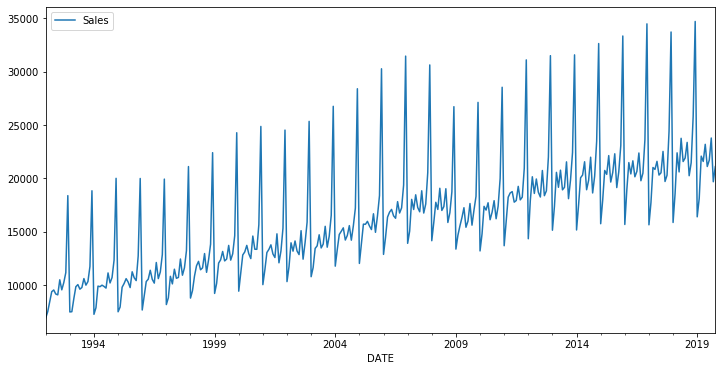

In [24]:
df.plot(figsize=(12,6));

**There is a clear yearly cycle, we can try forecast the seasonalities**

Hay un ciclo anual claro, podemos intentar pronosticar las estacionalidades

In [25]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


**Each row is a month,  we can substract  the number of months we set as test size from the len of df and that will be the  train/test split index**

Cada fila es un mes, podemos restar la cantidad de meses que establecemos como tamaño del test dataset del tamaño del df y el resultado será el índice para partir los sets train y test.

In [26]:
test_size = 18 #  18 months
split_index = len(df) - test_size

In [28]:
train = df.iloc[:split_index]
test = df.iloc[split_index:]

In [29]:
len(df)

334

In [30]:
len(train) + len(test)

334

In [31]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


_

### Scaling | Escalamiento

**Scale train and test sets**


Escala los sets train y test

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

_

### Generator

In [35]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

**Remember we can not fit a batch >= len of test set**

In [78]:
length = 12 # batch

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

**Let's take a look at the first element in the generator**

Echemos un vistazo al primer elemento en generator

In [37]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [38]:
X, y = generator[0]

**This means that given the X array of len = length...**

Esto significa que dado el array X de len = length...

In [39]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

**...the prediction of the next value (y) is:**

...la predicción del siguiente valor es:

In [40]:
y

array([[0.02047633]])

**If we compare y to the actual value in scaled_train...**

Si comparamos y con el valor correspondiente en scaled_train...

In [41]:
scaled_train[12]

array([0.02047633])

**good** 👌

---

## Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [52]:
generator[0][0].shape

(1, 12, 1)

In [79]:
n_features = 1 

model = Sequential()

model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### Callback for early stopping the training when given metric does not improve after a defined number of epochs patience

Función para detener de manera temprana el entrenamiento cuando una métrica dada no mejora después de cierto número de epochs

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Validation generator to pass it as validation data in the fit step

Generador de validación para pasarlo como val_data en el paso .fit

In [81]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                               length=length, batch_size=1)

### Training | Entrenamiento

In [82]:
model.fit(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0469 - val_loss: 0.0314
Epoch 2/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0194 - val_loss: 0.0023
Epoch 3/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0110 - val_loss: 0.0047
Epoch 4/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 5/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0053 - val_loss: 3.2531e-04
Epoch 6/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 7/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0034


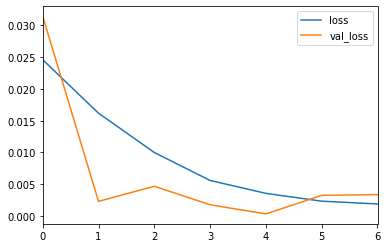

In [83]:
pd.DataFrame(model.history.history).plot()

**To test the model we are going to create a batch of the last points in the scaled train set to predict one point into the future**

Para probar el modelo creamos un batch de los últimos puntos en scaled_train para predecir un punto hacia el futuro

In [85]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ],
       [0.49658728]])

In [90]:
first_eval_batch.shape

(12, 1)

**Reshape the batch to the shape predict expects (1 , length, n_features)**

Transforma el batch a la forma que predict espera

In [91]:
first_eval_batch = first_eval_batch.reshape(1 , length, n_features)
first_eval_batch.shape

(1, 12, 1)

In [94]:
scaled_prediction = model.predict(first_eval_batch)

In [95]:
scaled_prediction

array([[0.46444902]], dtype=float32)

### Loop to collect len(test) number of predictions

**We predict just one point, we want to predict len(test) numbers of points into the future (a cycle). We will use a for loop to do that.**

**For loop does the following:**

**- Grab the last points in the training batch and reshape it so the model can accept it**

**- From that batch make a prediction of the next point and append it to the test predictions list**

**- Then update/move the current batch to the next set of points**

**- Loop will do this fo every point in the test set [for i in range(len(test))]**

__

**Loop para colectar len(test) número de predicciones**

Predijimos solo un punto hacia el futuro, queremos predecir len(test) número de puntos hacia el futuro (un ciclo), usaremos un loop for para lograr eso.


El loop for hace lo siguiente:

- Toma los últimos puntos en el batch y remodelelos para que el modelo pueda aceptarlos

- A partir de ese batch, hace una predicción del siguiente punto y lo agrega a la lista de predicciones 

- Luego actualiza/mueve el batch al siguiente conjunto de puntos

- El loop hará esto para cada punto en el conjunto de prueba [for i in range(len(test))]

In [96]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [97]:
current_batch.shape

(1, 12, 1)

**How does the update step work?**
current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

**current_batch[:,1:,:] returns the batch, the array, without the first element**

**np.append appends elements to a given array**

**current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)**

**For every cycle in the loop, np.append updates the current_batch with a new current_batch consisting of the previous batch without the first element and with the next value appended**

_

**Cómo funciona el último paso?**

current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

current_batch[:,1:,:] regresa el batch sin el primer elemento

np.append agrega elementos a un arreglo dado

Para cada ciclo en el loop, np.append actualiza current_batch con un nuevo current_batch que consiste en el batch anterior sin el primer elemento y con el siguiente valor agregado


---

## Model Performance | Desempeño del modelo

In [98]:
test_predictions

[array([0.46444902], dtype=float32),
 array([0.42807776], dtype=float32),
 array([0.43444437], dtype=float32),
 array([0.49111095], dtype=float32),
 array([0.4149329], dtype=float32),
 array([0.43360096], dtype=float32),
 array([0.5486944], dtype=float32),
 array([0.8692226], dtype=float32),
 array([0.29531437], dtype=float32),
 array([0.36842072], dtype=float32),
 array([0.48187843], dtype=float32),
 array([0.4278781], dtype=float32),
 array([0.4023285], dtype=float32),
 array([0.374592], dtype=float32),
 array([0.38006186], dtype=float32),
 array([0.4231048], dtype=float32),
 array([0.36840266], dtype=float32),
 array([0.3844976], dtype=float32)]

**test_predictions IS SCALED just like scaled_test, TRANSFORM IT TO THE RIGHT SCALE**

test_predictions está escalado justo como scaled_test, hay que transformarlo a la escala correcta

In [99]:
real_predictions = scaler.inverse_transform(test_predictions)
real_predictions

array([[19730.7837584 ],
       [18728.97374868],
       [18904.33566904],
       [20465.16002631],
       [18366.91198015],
       [18881.10490179],
       [22051.23778725],
       [30879.86678171],
       [15072.13905096],
       [17085.78031445],
       [20210.85946631],
       [18723.47470593],
       [18019.73596191],
       [17255.76221895],
       [17406.42400551],
       [18591.9984138 ],
       [17085.28286409],
       [17528.60224462]])

**test is already a DataFrame, we can add a column with the predictions**

test ya es un DataFrame, podemos agregar una columna con las predicciones

In [100]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [101]:
test['Predictions'] = real_predictions
test

C:\Users\USER\anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales,Predictions
DATE,,
2018-05-01,23764,19730.783758
2018-06-01,21589,18728.973749
2018-07-01,21919,18904.335669
2018-08-01,23381,20465.160026
2018-09-01,20260,18366.911980
2018-10-01,21473,18881.104902
2018-11-01,25831,22051.237787
2018-12-01,34706,30879.866782
2019-01-01,16410,15072.139051


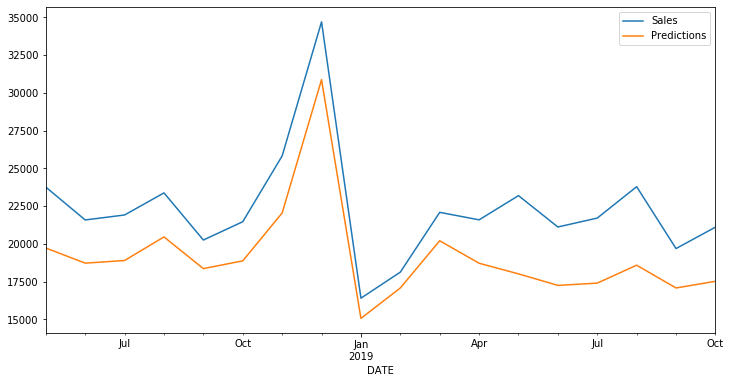

In [104]:
test.plot(figsize=(12,6));

In [107]:
n_features = 1 

model = Sequential()

model.add(LSTM(150, activation='relu', input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0316 - val_loss: 0.0137
Epoch 2/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0170 - val_loss: 0.0029
Epoch 3/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0164 - val_loss: 0.0016
Epoch 4/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 5/20
304/304 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0067


C:\Users\USER\anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


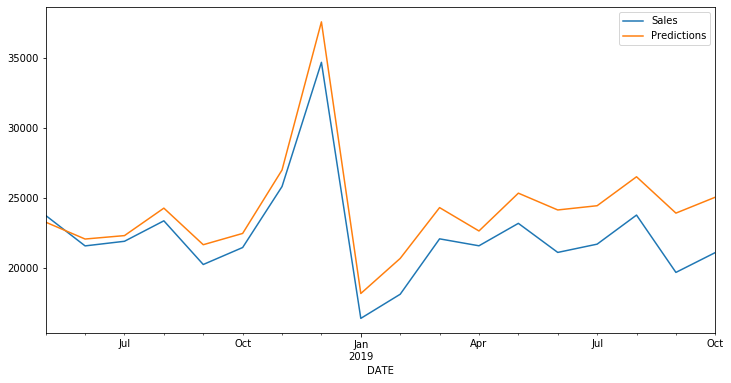

In [108]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    
    

real_predictions = scaler.inverse_transform(test_predictions)   
test['Predictions'] = real_predictions
test.plot(figsize=(12,6));

---

## Retrain and Forecasting

**When we are ok with the performance we retrain over the full dataset**

Cuando estemos ok con el desempeño del modelo, re entramos sobre el dataset completo

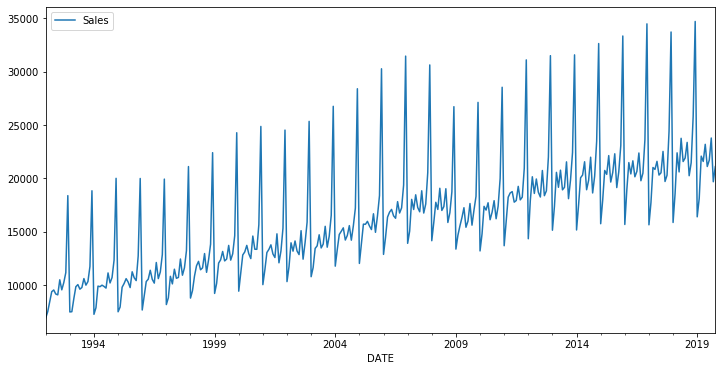

In [111]:
df.plot(figsize=(12,6));

In [1]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)
length = 18
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

NameError: name 'MinMaxScaler' is not defined

**Note in the retraining we don't monitor nor early stop, we go straight with the number epochs according to our test**

Nota en el reentrenamiento no monitoreamos ni detenemos de manera temprana vamos directo al número de epochs de acuerdo a nuestros tests

In [114]:
n_features = 1 
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=5)

Epoch 1/5
322/322 [==============================] - 1s 2ms/step - loss: 0.0293
Epoch 2/5
322/322 [==============================] - 1s 2ms/step - loss: 0.0184
Epoch 3/5
322/322 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 4/5
322/322 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 5/5
322/322 [==============================] - 1s 2ms/step - loss: 0.0030


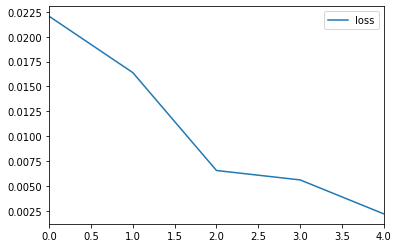

In [115]:
pd.DataFrame(model.history.history).plot()

**periods -> forecast length**

periods = tamaño del pronóstico que se desee realizar

In [116]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

**Re scale the forecast data**

Re escala los datos del pronóstico

In [117]:
forecast = full_scaler.inverse_transform(forecast)

In [118]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [121]:
forecast

array([[24466.63341713],
       [33076.39341164],
       [16493.3585341 ],
       [17685.79398727],
       [20798.49755478],
       [20408.10456109],
       [21829.09301853],
       [20037.55541015],
       [20573.18523979],
       [22371.84392357],
       [19003.8442173 ],
       [20204.56676507]])

**How to make a DateTime Index for the forecast values?**

Cómo hacer un índice para los valores del pronóstico?

In [122]:
pd.date_range(start='2019-11-01', periods=periods, freq='MS')

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [123]:
type(pd.date_range(start='2019-11-01', periods=periods, freq='MS'))

pandas.core.indexes.datetimes.DatetimeIndex

**pd.date_range returns a DatetimeIndex object with 'periods' number of elements with a Monthly Start frequency**

pd.date_range regresa un objeto DatetimeIndex con 'periods' número de elementos con una frecuencia Monthly Start


In [124]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods, freq='MS')

_

**Forecast DataFrame**

In [126]:
forecast_df = pd.DataFrame(data= forecast, index=forecast_index, columns=['Forecast'])

In [127]:
forecast_df

,Forecast
2019-11-01,24466.633417
2019-12-01,33076.393412
2020-01-01,16493.358534
2020-02-01,17685.793987
2020-03-01,20798.497555
2020-04-01,20408.104561
2020-05-01,21829.093019
2020-06-01,20037.555410
2020-07-01,20573.185240
2020-08-01,22371.843924


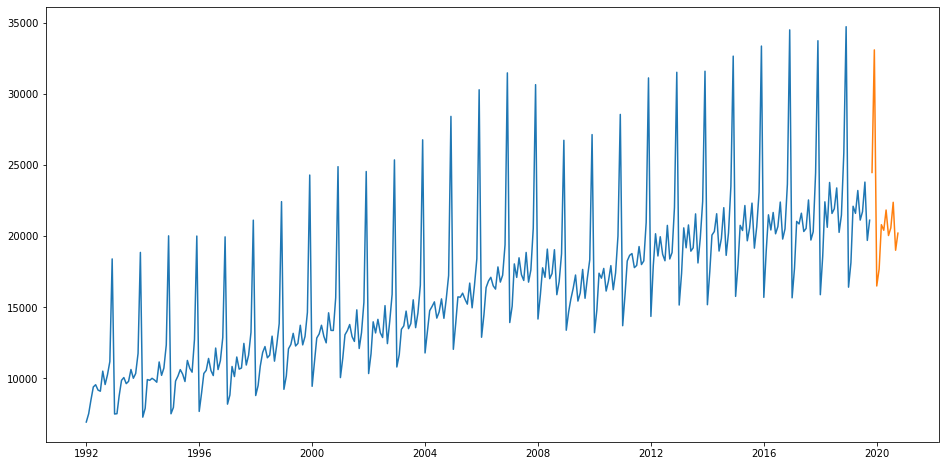

In [131]:
plt.figure(figsize=(16,8))
plt.plot(df)
plt.plot(forecast_df)

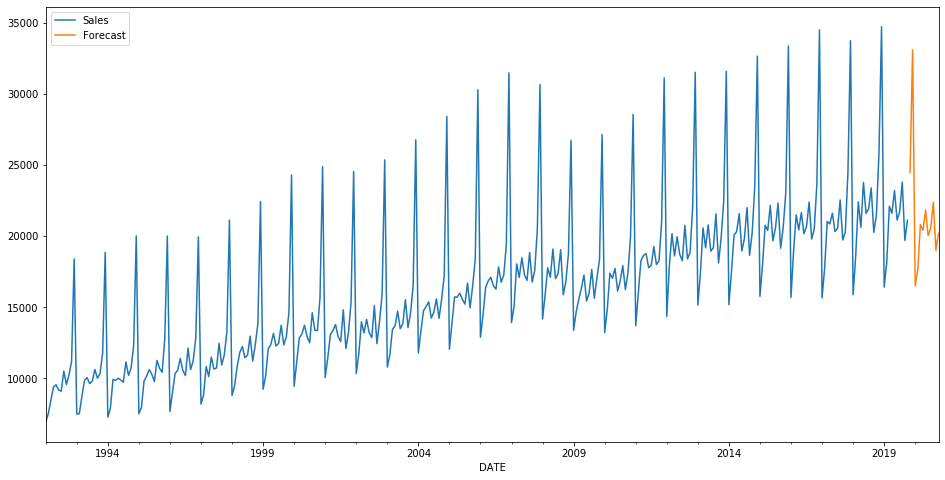

In [135]:
ax = df.plot()
forecast_df.plot(figsize=(16,8), ax=ax);

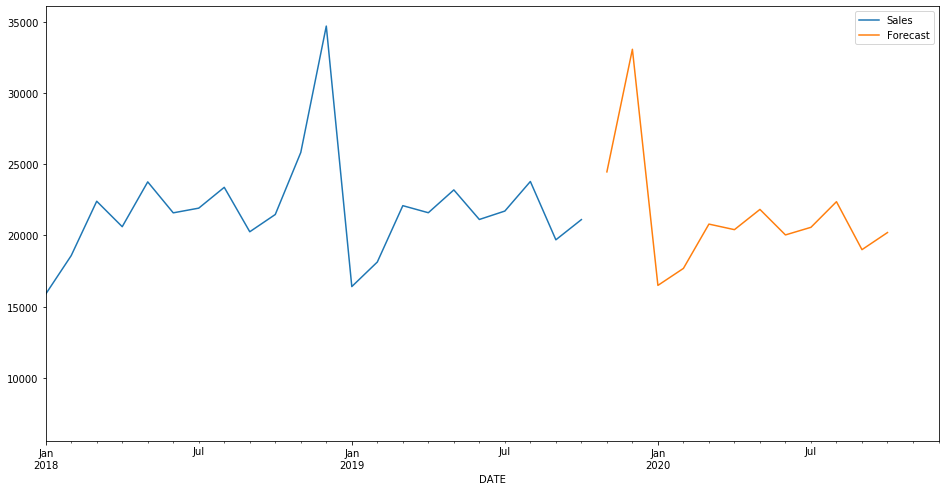

In [145]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(16,8))
plt.xlim('2018-01-01','2020-12-01');